In [1]:
# basics
import math

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#from livelossplot import PlotLossesKerasTF
from PIL import Image

# TensorFlow
import tensorflow as tf

# check tensorflow version. should be 2.X
print(tf.__version__)

2.0.0


In [2]:
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


In [3]:
# Create dictionary of target classes
label_dict = {
 0: 'Not stable',
 1: 'Stable'
}

def query_label(key):
    return label_dict.get(key)

In [4]:
## PLOTTING FUNCTIONS
   
def plot_image(my_image):
    plt.figure()
    plt.imshow(my_image, cmap='gray')
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def plot_image_grid(num_images, images, labels):
    plt.figure(figsize=(10,10))
    for i in range(num_images):
        plt.subplot(int(math.sqrt(num_images)), int(math.sqrt(num_images)), i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap='gray')
        plt.xlabel(query_label(labels[i]))
    plt.show()


In [5]:
## LOADING DATA FUNCTIONS

def createPaths(path,folder,filename):
    # file paths for the label path
    label_file = os.path.join(path,folder,filename)
    
    # file paths for the images
    image_files = sorted([os.path.join(path,folder, file) for file in os.listdir(path + "/" + folder) if file.endswith('.JPG')])   
    
    return image_files, label_file

def loadImages(path, n=1, dim = [28,28]):
    images = np.empty(0)
    
    for i in range(n):
        img = Image.open(path[i]).convert('L').resize(dim) #Greyscale
        images = np.append(images,np.array(img))
        
    return images.reshape(n,dim[0],dim[1])

def loadLabels(path, n):
    return  np.loadtxt(path,dtype=int)

In [115]:
## PRE-PROCESS IMAGE FUNCTIONS

# normalize the data by subtracting the mean and dividing by std
def normalize(X, bias=0):
    n, d = X.shape
    m = np.mean(X, axis=1).reshape(n, 1) * np.ones((1, d))
    s = np.std(X, axis=1).reshape(n, 1) * np.ones((1, d))
    Xn = (X - m) / s
    
    if bias != 0:
        Xn = np.hstack((Xn, bias * np.ones((n, 1))))
    return Xn

# flatten the images into d-dimensional vectors for training
def flatten_images(X):
    s = X.shape
    n = s[0]
    d = np.prod(s[1:])
    return X.reshape(n, d)


In [116]:
# Define image paths
path = "./images"
train_folder = 'train'
test_folder = 'test'
label_file = '_labels'

(train_paths,train_label_path) = createPaths(path, train_folder, label_file)
(test_paths,test_label_path) = createPaths(path, test_folder, label_file)

n_train = len(train_paths)
n_test = len(test_paths)

dim = [50,50]

In [119]:
#Read in and Resize Data
X_train = loadImages(train_paths,n_train,dim)
y_train = loadLabels(train_label_path,n_train)

X_test = loadImages(test_paths, n_test, dim)
y_test = loadLabels(test_label_path,n_test)

print("After resizing, train images:",X_train[0].shape)
print("After resizing, test images:",X_test[0].shape)

After resizing, train images: (50, 50)
After resizing, test images: (50, 50)


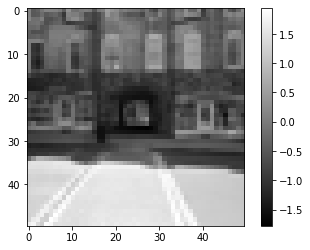

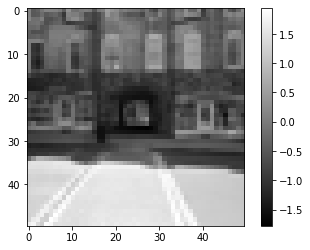

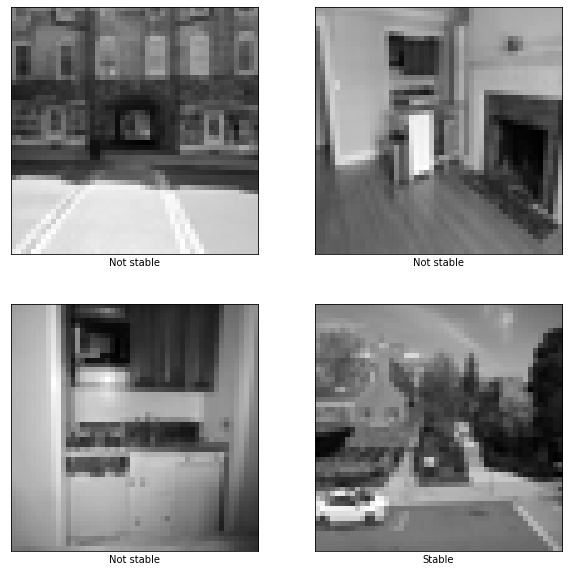

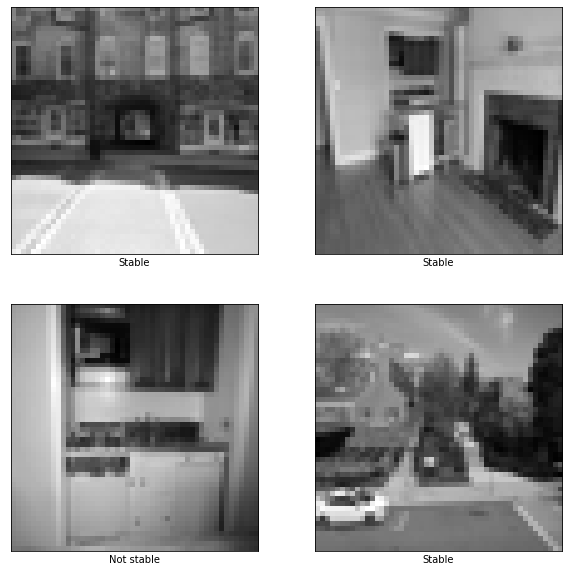

In [120]:
#Flatten and Normalize Data
X_train = normalize(flatten_images(X_train), bias = 0)
X_test = normalize(flatten_images(X_test), bias = 0)

#a = X_train[0].reshape(dim[0], dim[1])
X_train = X_train.reshape(n_train,dim[0], dim[1])
X_test = X_train.reshape(n_test,dim[0], dim[1])

plot_image(X_train[0])
plot_image(X_test[0])

plot_image_grid(4,X_train,y_train)
plot_image_grid(4,X_test,y_test)

## Build NN

In [151]:
# set up the layers

model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(dim[0],dim[1]))) # input layer
model.add(tf.keras.layers.Dense(100, activation='relu')) # hidden layer
#model.add(tf.keras.layers.Dense(1, activation='softmax')) # output layer

model.add(tf.keras.layers.Dense(2, activation='softmax')) # output layer

In [152]:
# set up loss and optimizer
my_optimize = tf.keras.optimizers.Adam()

#my_loss = tf.keras.losses.binary_crossentropy

my_loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [153]:
# compile the model
model.compile(optimizer=my_optimize, loss=my_loss, metrics=['accuracy'])

## Train NN

In [154]:
# instantiate plotter to visualize loss and accuracy during training
#plotlosses = PlotLossesKerasTF()

In [155]:
# train model on cpu
#model.fit(train_images, train_labels, epochs=20, callbacks=[plotlosses])
model.fit(X_train, y_train, batch_size = 1, epochs=20)

Train on 5 samples
Epoch 1/20
5/5 [==============================] - 0s 70ms/sample - loss: 0.5569 - accuracy: 0.6000
Epoch 2/20
5/5 [==============================] - 0s 3ms/sample - loss: 2.6941e-06 - accuracy: 1.0000
Epoch 3/20
5/5 [==============================] - 0s 3ms/sample - loss: 5.0068e-07 - accuracy: 1.0000
Epoch 4/20
5/5 [==============================] - 0s 3ms/sample - loss: 4.7684e-08 - accuracy: 1.0000
Epoch 5/20
5/5 [==============================] - 0s 4ms/sample - loss: 2.3842e-08 - accuracy: 1.0000
Epoch 6/20
5/5 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
5/5 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
5/5 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/20
5/5 [==============================] - 0s 4ms/sample -

## Test Predictions

In [169]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=5)
print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print('\n# Generate predictions for samples')
predictions = model.predict(X_test[:5])

predictions = np.argmax(predictions,axis=1)
print(predictions)


# Evaluate on test data
5/1 [======================================================================================================================================================] - 0s 551us/sample - loss: 17.3003 - accuracy: 0.4000
test loss, test acc: [17.30032730102539, 0.4]

# Generate predictions for samples
[0 0 0 1 0]


In [170]:
confusion = tf.math.confusion_matrix(y_test, predictions)

print(confusion)

tf.Tensor(
[[1 0]
 [3 1]], shape=(2, 2), dtype=int32)
